In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# import statsmodels.api as sm
from matplotlib import cm
# import matplotlib.cm as cmx
# import matplotlib.colors as colors
plt.rcParams["font.sans-serif"] = "Arial"


from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 3
plt.rcParams["font.sans-serif"] = "Arial"
matplotlib.rcParams.update({'font.size': 8})
# plt.rcParams['mathtext.fontset'] = 'custom'
# plt.rcParams['mathtext.rm'] = 'Arial'
# plt.rcParams['mathtext.it'] = 'Arial:italic'
#plt.rcParams['mathtext.bf'] = 'Arial:bold'
import matplotlib as mpl
# import mpld3
# from mpld3 import plugins
%matplotlib inline

#import seaborn as sns
#mpl.rcParams['legend.scatterpoints '] = 1

In [2]:
df = pd.read_csv('Data/HoplandNADP-NTN.csv', skiprows=3)
df.head()

,SiteID,Date On,Date Off,ldCa,Ca,ldMg,Mg,ldK,K,ldNa,...,Lab Cond,Field Cond,FV Cond,Svol,RG Ppt,Sub Ppt,Lab Type,Valcode,Invalcode,Notes
0,CA45,10/03/1979,10/09/1979,,-9.00,,-9.000,,-9.000,,...,-9.0,-9.0,-,0.0,0.00,0.00,da,d,,na
1,CA45,10/09/1979,10/16/1979,,0.08,,0.035,,0.030,,...,6.0,5.6,i,-9.0,10.67,10.67,w,w,,NaN
2,CA45,10/16/1979,10/23/1979,,0.04,,0.074,,0.024,,...,6.0,8.0,i,2951.0,44.70,44.70,w,w,,NaN
3,CA45,10/23/1979,10/30/1979,<,0.02,,0.010,,0.010,,...,2.4,4.5,i,4241.0,65.79,65.79,w,w,,NaN
4,CA45,10/30/1979,11/06/1979,,0.05,,0.048,,0.014,,...,6.4,8.8,i,2986.5,47.75,47.75,w,w,,NaN


In [3]:
df['date']=pd.to_datetime(df['Date Off'])

In [4]:
df.replace(to_replace=-9,value=np.nan,inplace=True)

In [15]:
df.head()

,SiteID,Date On,Date Off,ldCa,Ca,ldMg,Mg,ldK,K,ldNa,...,Field Cond,FV Cond,Svol,RG Ppt,Sub Ppt,Lab Type,Valcode,Invalcode,Notes,date
0,CA45,10/03/1979,10/09/1979,,NaN,,NaN,,NaN,,...,NaN,-,0.0,0.00,0.00,da,d,,na,1979-10-09
1,CA45,10/09/1979,10/16/1979,,0.08,,0.035,,0.030,,...,5.6,i,NaN,10.67,10.67,w,w,,NaN,1979-10-16
2,CA45,10/16/1979,10/23/1979,,0.04,,0.074,,0.024,,...,8.0,i,2951.0,44.70,44.70,w,w,,NaN,1979-10-23
3,CA45,10/23/1979,10/30/1979,<,0.02,,0.010,,0.010,,...,4.5,i,4241.0,65.79,65.79,w,w,,NaN,1979-10-30
4,CA45,10/30/1979,11/06/1979,,0.05,,0.048,,0.014,,...,8.8,i,2986.5,47.75,47.75,w,w,,NaN,1979-11-06


In [10]:
hyojin_metadata = pd.read_excel('Data/20150519_mastersheet_rainwater.xls')
hyojin_metadata['datetime']=pd.to_datetime(hyojin_metadata['date/time'])
hyojin_metadata.head()


,sample id,sample id numb,description,description.1,date/time,Bag Label,Vial Label,Label Color,# of vials,Vial type,Lid type,collected by,received in 395 McCone,notes,Wood/Kim taken,Unnamed: 15,datetime
0,1 KR,1,HQ,1,2008-11-01 11:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-01 11:45:00
1,2 KR,2,HQ,1,2008-11-02 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-02 14:00:00
2,3 KR,3,CONGER,2,2008-11-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-02 00:00:00
3,4 KR,4,CONGER,2,2008-11-04 13:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-04 13:10:00
4,5 KR,5,HQ,1,2008-11-04 12:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-04 12:25:00


In [9]:
hyojin_data = pd.read_excel('Data/20150519_ICP_rainwater_results_nM.xls')
hyojin_data.head()

,Sample Id,Li7(LR),Li7(LR)_SD,B11(LR),B11(LR)_SD,Ca43(LR),Ca43(LR)_SD,Rb85(LR),Rb85(LR)_SD,Sr88(LR),...,Mo98(MR),Mo98(MR)_SD,In115(MR),In115(MR)_SD,Ba138(MR),Ba138(MR)_SD,K39(HR),K39(HR)_SD,In115(HR),In115(HR)_SD
0,4,42.185460,0.851631,29055.949940,404.845657,12943.851530,419.060591,4.768392,0.227446,43.550509,...,0.0,0.0,7.545642,1.596472,96.619786,1.341082,41104.195090,2620.221038,2.700845,2.777406
1,5,12.269231,0.020840,12963.549520,346.808830,2620.743299,39.410108,0.408564,0.011587,17.796393,...,0.0,0.0,7.545642,0.354076,36.023877,0.632119,1899.463117,41.932908,3.093944,1.864173
2,6,2.597514,0.218923,285.154003,4.983476,1911.244165,26.991098,0.279225,0.012734,5.179210,...,0.0,0.0,7.545642,7.605096,3.267215,0.019471,925.971924,32.682592,1.009849,0.922737
3,7,14.905692,0.397456,541.864160,12.409897,14764.383060,430.656166,5.618680,0.156353,58.163541,...,0.0,0.0,7.545642,6.303074,155.731668,2.017676,46888.532890,2720.537783,-0.650983,0.506126
4,8,27.235730,0.274997,884.814248,18.282144,20815.407790,708.781243,8.119726,0.146486,102.540974,...,0.0,0.0,7.545642,5.975130,293.749895,7.720054,77493.022190,3564.023407,1.065830,0.434391


In [12]:
hyojin = hyojin_metadata.merge(hyojin_data, left_on='sample id numb', right_on='Sample Id',how='inner',suffixes=('',''))
hyojin.head()

,sample id,sample id numb,description,description.1,date/time,Bag Label,Vial Label,Label Color,# of vials,Vial type,...,Mo98(MR),Mo98(MR)_SD,In115(MR),In115(MR)_SD,Ba138(MR),Ba138(MR)_SD,K39(HR),K39(HR)_SD,In115(HR),In115(HR)_SD
0,4 KR,4,CONGER,2,2008-11-04 13:10:00,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,7.545642,1.596472,96.619786,1.341082,41104.195090,2620.221038,2.700845,2.777406
1,5 KR,5,HQ,1,2008-11-04 12:25:00,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,7.545642,0.354076,36.023877,0.632119,1899.463117,41.932908,3.093944,1.864173
2,6 KR,6,HQ,1,2008-11-06 13:01:00,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,7.545642,7.605096,3.267215,0.019471,925.971924,32.682592,1.009849,0.922737
3,7 KR,7,CONGER,2,2008-11-06 00:00:00,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,7.545642,6.303074,155.731668,2.017676,46888.532890,2720.537783,-0.650983,0.506126
4,8 KR,8,CONGER,2,2008-11-09 00:00:00,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,7.545642,5.975130,293.749895,7.720054,77493.022190,3564.023407,1.065830,0.434391


In [13]:
hyojin['Si (ppm)']=hyojin['Si28(MR)']*28.0855*1000/(10**9)
hyojin['Mg (ppm)']=hyojin['Mg25(MR)']*24.3*1000/(10**9)
hyojin['Ca (ppm)']=hyojin['Ca44(MR)']*40.08*1000/(10**9)
hyojin['Na (ppm)']=hyojin['Na23(MR)']*22.99*1000/(10**9)
hyojin['K (ppm)']=hyojin['K39(HR)']*39.1*1000/(10**9)

In [31]:
conger = hyojin[(hyojin['description']=='CONGER') | (hyojin['description']=='CONGER ')]
HQ = hyojin[hyojin['description']=='HQ']
angelo = hyojin[hyojin['description']=='ANGELO']

In [34]:
len(angelo)

198

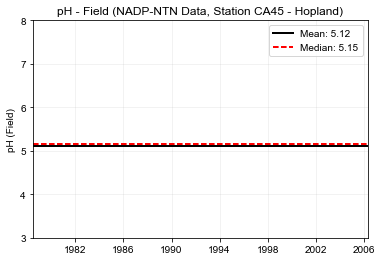

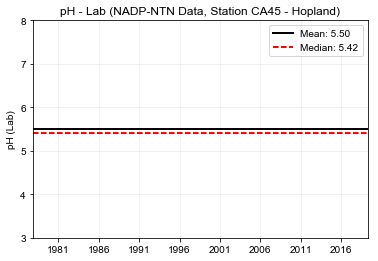

In [6]:
fig,ax=plt.subplots()

plt.scatter(df['date'].values,df['pH Field'].values,facecolor='white')
plt.ylim([3,8])
# plt.yscale('log')



ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.grid(alpha=0.2)
plt.axhline(df['pH Field'].mean(),label='Mean: '+format(df['pH Field'].mean(), '.2f') ,color='k',lw=2)
plt.axhline(df['pH Field'].median(),label='Median: '+format(df['pH Field'].median(), '.2f') ,ls='--',color='red',lw=2)
plt.ylabel('pH (Field)')
plt.legend()
plt.title('pH - Field (NADP-NTN Data, Station CA45 - Hopland)')
plt.savefig('Figures\\pH - Field -Precipitation Timeseries, NADP-NTN Data, Station CA45 - Hopland.pdf')
plt.show()

fig,ax=plt.subplots()

plt.scatter(df['date'].values,df['pH Lab'].values,facecolor='white')
plt.ylim([3,8])
# plt.yscale('log')



ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.grid(alpha=0.2)
plt.axhline(df['pH Lab'].mean(),label='Mean: '+format(df['pH Lab'].mean(), '.2f') ,color='k',lw=2)
plt.axhline(df['pH Lab'].median(),label='Median: '+format(df['pH Lab'].median(), '.2f'),ls='--',color='red',lw=2)
plt.ylabel('pH (Lab)')
plt.legend()
plt.title('pH - Lab (NADP-NTN Data, Station CA45 - Hopland)')
plt.savefig('Figures\\pH - Lab -Precipitation Timeseries, NADP-NTN Data, Station CA45 - Hopland.pdf')
plt.show()

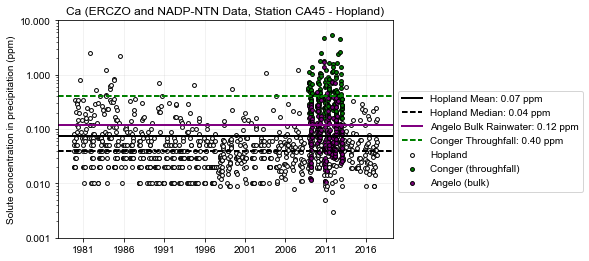

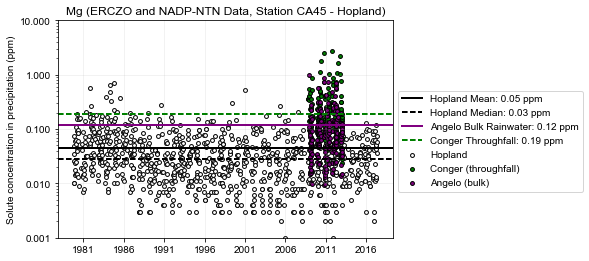

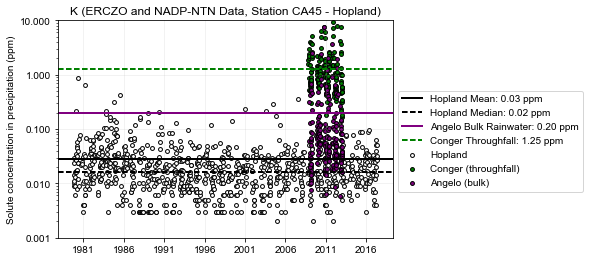

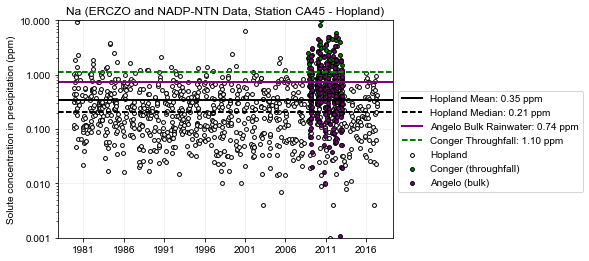

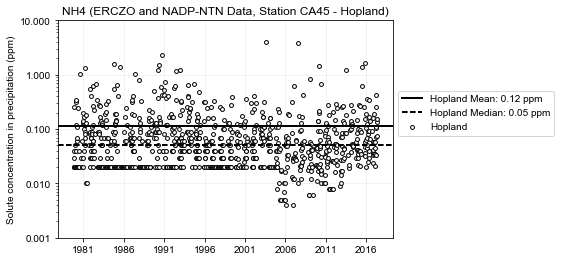

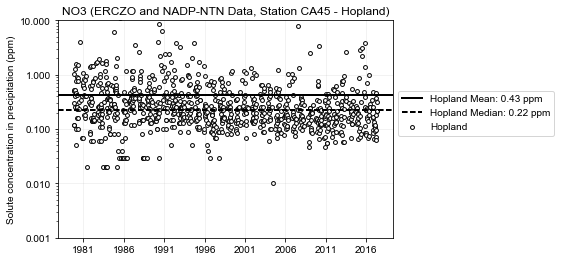

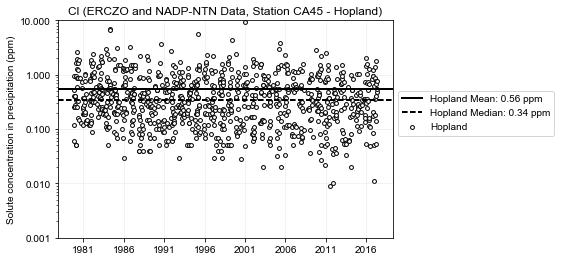

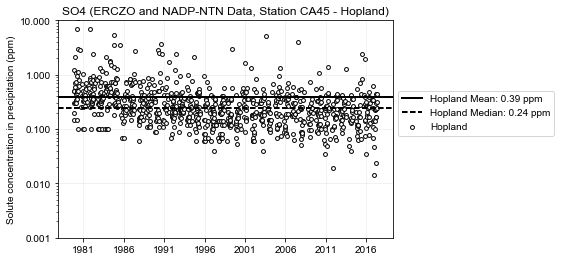

In [50]:
solutes = ['Ca', 'Mg', 'K', 'Na', 'NH4', 'NO3', 'Cl', 'SO4']


for solute in solutes:
    fig,ax=plt.subplots()

    plt.scatter(df['date'].values,df[solute].values,facecolor='white',edgecolors='black',label='Hopland',s=15)
    plt.ylim([0.001,10])
    plt.yscale('log')



    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    plt.grid(alpha=0.2)
    plt.axhline(df[solute].mean(),label='Hopland Mean: '+format(df[solute].mean(), '.2f') + ' ppm',color='k',lw=2)
    plt.axhline(df[solute].median(),label='Hopland Median: '+format(df[solute].median(), '.2f') + ' ppm',ls='--',color='black',lw=2)
    
    if solute == 'Ca':
        plt.axhline(0.12,label='Angelo Bulk Rainwater: 0.12 ppm',color='purple',lw=2)    
        plt.axhline(0.40,label='Conger Throughfall: 0.40 ppm',color='green',lw=2,ls='--') 
        plt.scatter(conger['datetime'].values,conger['Ca (ppm)'],facecolor='green',edgecolors='black',label='Conger (throughfall)',s=15)
        plt.scatter(angelo['datetime'].values,angelo['Ca (ppm)'],facecolor='purple',edgecolors='black',label='Angelo (bulk)',s=15)

    if solute == 'Mg':
        plt.axhline(0.12,label='Angelo Bulk Rainwater: 0.12 ppm',color='purple',lw=2)    
        plt.axhline(0.19,label='Conger Throughfall: 0.19 ppm',color='green',lw=2,ls='--')    
        plt.scatter(conger['datetime'].values,conger['Mg (ppm)'],facecolor='green',edgecolors='black',label='Conger (throughfall)',s=15)
        plt.scatter(angelo['datetime'].values,angelo['Mg (ppm)'],facecolor='purple',edgecolors='black',label='Angelo (bulk)',s=15)
    if solute == 'K':
        plt.axhline(0.20,label='Angelo Bulk Rainwater: 0.20 ppm',color='purple',lw=2)    
        plt.axhline(1.25,label='Conger Throughfall: 1.25 ppm',color='green',lw=2,ls='--')    
        plt.scatter(conger['datetime'].values,conger['K (ppm)'],facecolor='green',edgecolors='black',label='Conger (throughfall)',s=15)
        plt.scatter(angelo['datetime'].values,angelo['K (ppm)'],facecolor='purple',edgecolors='black',label='Angelo (bulk)',s=15)
    if solute == 'Na':
        plt.axhline(.74,label='Angelo Bulk Rainwater: 0.74 ppm',color='purple',lw=2)    
        plt.axhline(1.10,label='Conger Throughfall: 1.10 ppm',color='green',lw=2,ls='--')    
        plt.scatter(conger['datetime'].values,conger['Na (ppm)'],facecolor='green',edgecolors='black',label='Conger (throughfall)',s=15)
        plt.scatter(angelo['datetime'].values,angelo['Na (ppm)'],facecolor='purple',edgecolors='black',label='Angelo (bulk)',s=15)

    
    
    plt.ylabel('Solute concentration in precipitation (ppm)')
    lgd = plt.legend(bbox_to_anchor=(1.0, .7))
    plt.title(solute + ' (ERCZO and NADP-NTN Data, Station CA45 - Hopland)')
    plt.savefig('Figures\\'+solute + ' -Precipitation Timeseries, NADP-NTN Data, Station CA45 - Hopland.pdf',
                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

In [75]:
df[['Ca', 'Mg', 'K', 'Na', 'NH4', 'NO3', 'Cl', 'SO4', 'pH Field', 'pH Lab']].describe().to_excel('HoplandPrecipSummary.xls')


In [42]:
df.index=df['date']

In [43]:
df['doy'] = df.index.dayofyear

In [41]:
angelo.index=angelo['datetime']
angelo['doy'] = angelo.index.dayofyear

conger.index=conger['datetime']
conger['doy'] = conger.index.dayofyear

C:\Users\wjh\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\wjh\Anaconda\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


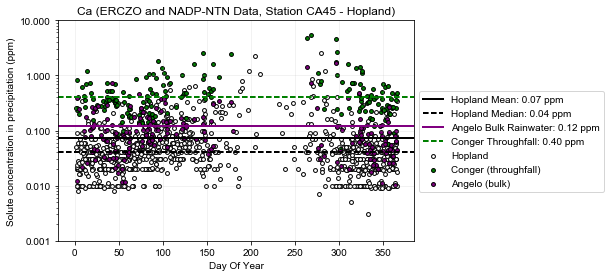

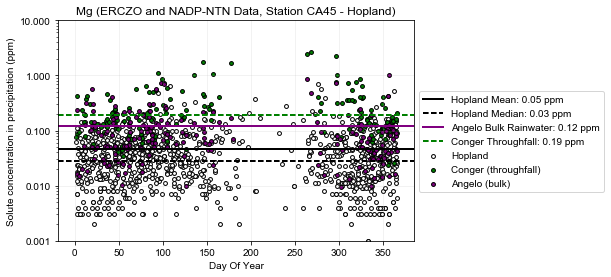

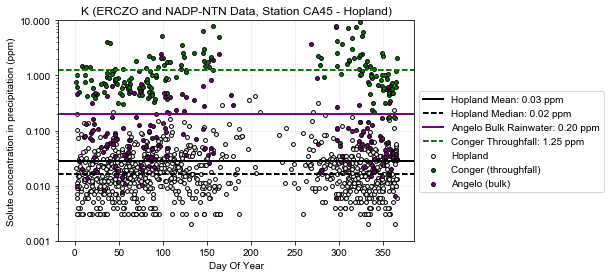

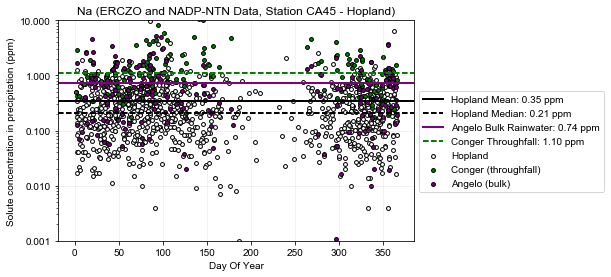

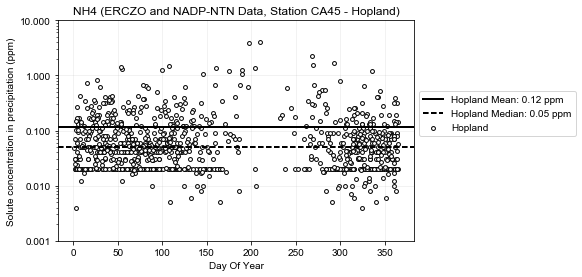

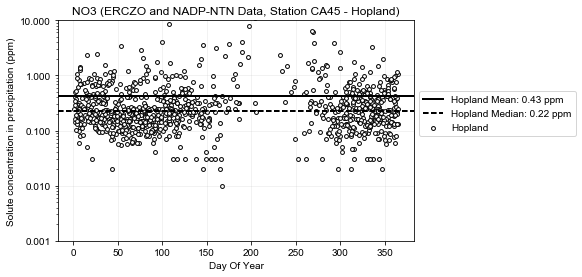

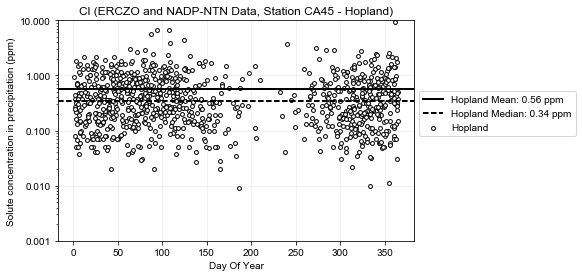

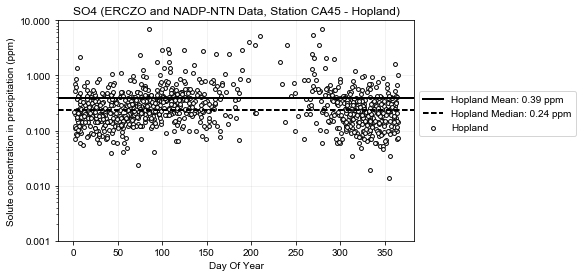

In [49]:
solutes = ['Ca', 'Mg', 'K', 'Na', 'NH4', 'NO3', 'Cl', 'SO4']


for solute in solutes:
    fig,ax=plt.subplots()

    plt.scatter(df['doy'].values,df[solute].values,facecolor='white',edgecolors='black',s=15,label='Hopland')

    plt.ylim([0.001,10])
    plt.xlabel('Day Of Year')
    plt.yscale('log')



    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    plt.grid(alpha=0.2)
    plt.axhline(df[solute].mean(),label='Hopland Mean: '+format(df[solute].mean(), '.2f') + ' ppm',color='k',lw=2)
    plt.axhline(df[solute].median(),label='Hopland Median: '+format(df[solute].median(), '.2f') + ' ppm',ls='--',color='black',lw=2)
    
    if solute == 'Ca':
        plt.axhline(0.12,label='Angelo Bulk Rainwater: 0.12 ppm',color='purple',lw=2)    
        plt.axhline(0.40,label='Conger Throughfall: 0.40 ppm',color='green',lw=2,ls='--')
        plt.scatter(conger['doy'].values,conger['Ca (ppm)'],facecolor='green',edgecolors='black',label='Conger (throughfall)',s=15)
        plt.scatter(angelo['doy'].values,angelo['Ca (ppm)'],facecolor='purple',edgecolors='black',label='Angelo (bulk)',s=15)

    if solute == 'Mg':
        plt.axhline(0.12,label='Angelo Bulk Rainwater: 0.12 ppm',color='purple',lw=2)    
        plt.axhline(0.19,label='Conger Throughfall: 0.19 ppm',color='green',lw=2,ls='--')    
        plt.scatter(conger['doy'].values,conger['Mg (ppm)'],facecolor='green',edgecolors='black',label='Conger (throughfall)',s=15)
        plt.scatter(angelo['doy'].values,angelo['Mg (ppm)'],facecolor='purple',edgecolors='black',label='Angelo (bulk)',s=15)
    if solute == 'K':
        plt.axhline(0.20,label='Angelo Bulk Rainwater: 0.20 ppm',color='purple',lw=2)    
        plt.axhline(1.25,label='Conger Throughfall: 1.25 ppm',color='green',lw=2,ls='--')    
        plt.scatter(conger['doy'].values,conger['K (ppm)'],facecolor='green',edgecolors='black',label='Conger (throughfall)',s=15)
        plt.scatter(angelo['doy'].values,angelo['K (ppm)'],facecolor='purple',edgecolors='black',label='Angelo (bulk)',s=15)
    if solute == 'Na':
        plt.axhline(.74,label='Angelo Bulk Rainwater: 0.74 ppm',color='purple',lw=2)    
        plt.axhline(1.10,label='Conger Throughfall: 1.10 ppm',color='green',lw=2,ls='--')    
        plt.scatter(conger['doy'].values,conger['Na (ppm)'],facecolor='green',edgecolors='black',label='Conger (throughfall)',s=15)
        plt.scatter(angelo['doy'].values,angelo['Na (ppm)'],facecolor='purple',edgecolors='black',label='Angelo (bulk)',s=15)

    
    
    plt.ylabel('Solute concentration in precipitation (ppm)')
    lgd = plt.legend(bbox_to_anchor=(1.0, .7))
    plt.title(solute + ' (ERCZO and NADP-NTN Data, Station CA45 - Hopland)')
    plt.tight_layout()
    plt.savefig('Figures\\DOY\\'+solute + '- DOY -Precipitation Timeseries, NADP-NTN Data, Station CA45 - Hopland.pdf',
                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()